Using TensorFlow backend.


(50000, 28, 28) (50000,)


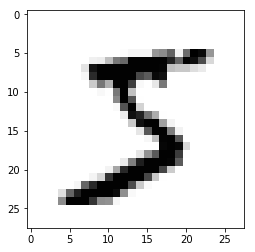

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
print(X_train[0].shape)
print(y_train[:5])


(28, 28)
[5 0 4 1 9]


In [3]:
import tensorflow as tf
print(tf.__version__)
s = tf.InteractiveSession()
writer = tf.summary.FileWriter("/tmp/tboard", graph=s.graph)

1.8.0


In [4]:
input_X = tf.placeholder('float32', [None, 28, 28])
input_y = tf.placeholder('int64', [None])

In [11]:
flatten = tf.layers.flatten(input_X)
dense_1 = tf.layers.dense(flatten, 128, activation = tf.nn.relu6, 
                kernel_initializer = tf.keras.initializers.he_normal())
output = tf.layers.dense(dense_1, 10, kernel_initializer = tf.keras.initializers.he_normal())
predicted_y = tf.squeeze(tf.argmax(output, axis = 1))
acc, acc_op = tf.metrics.accuracy(predicted_y, input_y)

loss = tf.losses.sparse_softmax_cross_entropy(input_y, output)
optimizer = tf.train.AdamOptimizer().minimize(loss)

In [12]:
predicted_y

<tf.Tensor 'Squeeze_1:0' shape=<unknown> dtype=int64>

In [6]:
import numpy as np
def batch_generator(xs,ys, batch_size=32):
    batch_x = []
    batch_y = []
    for x, y in zip(xs, ys):
        batch_x.append(x)
        batch_y.append(y)
        if len(batch_x) == batch_size:
            yield batch_x, batch_y
            batch_x, batch_y = [], []
    yield batch_x, batch_y

16
7


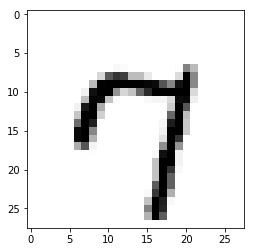

In [7]:
r = np.random.permutation(len(y_train))
X_train_batch = X_train[r,:,:]
y_train_batch = y_train[r]
x, y = list(batch_generator(X_train_batch, y_train_batch))[-1]
print(len(y))
print(y[-1])
plt.imshow(x[-1], cmap="Greys")

In [16]:
epochs = 30
s.run(tf.local_variables_initializer())
s.run(tf.global_variables_initializer())
train_accs, test_accs, train_losses, test_losses = [], [], [], []

for epoch in range(epochs):
    r = np.random.permutation(len(y_train))
    X_train_batch = X_train[r,:,:]
    y_train_batch = y_train[r]
    for batch_x, batch_y in batch_generator(X_train_batch, y_train_batch):
        s.run(optimizer, {input_X: batch_x, input_y: batch_y})
    train_loss = s.run(loss, {input_X: X_train, input_y: y_train})
    print("train_loss at iter %i :%.4f" % (epoch, train_loss))
    test_loss = s.run(loss, {input_X: X_test, input_y: y_test})
    print("test_loss at iter %i :%.4f" % (epoch, test_loss))
    _ = s.run(acc_op, {input_X: X_train, input_y: y_train})
    train_acc = s.run(acc, {input_X: X_train, input_y: y_train})
    print("train acc:", train_acc)
    _ = s.run(acc_op, {input_X: X_test, input_y: y_test})
    test_acc = s.run(acc, {input_X: X_test, input_y: y_test})
    print("test acc:", test_acc)
    print()
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

train_loss at iter 0 :0.1407
test_loss at iter 0 :0.1543
train acc: 0.9595
test acc: 0.9587333

train_loss at iter 1 :0.0906
test_loss at iter 1 :0.1173
train acc: 0.9657
test acc: 0.9655833

train_loss at iter 2 :0.0630
test_loss at iter 2 :0.0938
train acc: 0.9704059
test acc: 0.97047776

train_loss at iter 3 :0.0478
test_loss at iter 3 :0.0873
train acc: 0.97405654
test acc: 0.9739958

train_loss at iter 4 :0.0384
test_loss at iter 4 :0.0824
train acc: 0.97655517
test acc: 0.9764867

train_loss at iter 5 :0.0367
test_loss at iter 5 :0.0929
train acc: 0.9781486
test acc: 0.9779278

train_loss at iter 6 :0.0242
test_loss at iter 6 :0.0826
train acc: 0.9797756
test acc: 0.97965

train_loss at iter 7 :0.0222
test_loss at iter 7 :0.0820
train acc: 0.98111486
test acc: 0.9809979

train_loss at iter 8 :0.0122
test_loss at iter 8 :0.0701
train acc: 0.98251885
test acc: 0.9824537

train_loss at iter 9 :0.0114
test_loss at iter 9 :0.0764
train acc: 0.98364407
test acc: 0.98356

train_loss at 

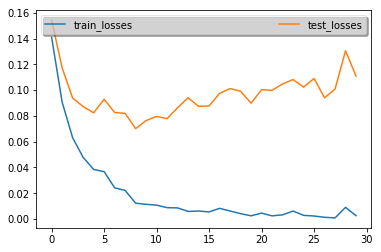

In [18]:
import matplotlib.pyplot as plt
ax = plt.subplot(111)
plt.plot(range(epochs), train_losses, label="train_losses")
plt.plot(range(epochs), test_losses, label="test_losses")
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)


plt.show()